In [1]:
using PyPlot
using KrylovKit
using DelimitedFiles
using LinearAlgebra
using SparseArrays

In [2]:
using TopologyOptimizationHelper

In [3]:
Lx = 5
Ly = 5
res = 20 
ω = π
N = M = 120;

In [80]:
b = zeros(N,M)
offset = -round(Int, res * (0.1 + 1.5))
b[N÷2 + offset,M÷2] = 1
ε_vac = ones(N,M)
A_vac, _, _ = Maxwell2d(Lx, Ly, ε_vac, ω; resolution=res)
u = A_vac \ vec(b)
@show LDOS_vac = -imag(u' * vec(b))

LDOS_vac = -(imag(u' * vec(b))) = 0.0006163703353240245


0.0006163703353240245

In [5]:
rc("font", family="serif", serif="Times New Roman")
rc("mathtext", fontset="cm")
rc("xtick", labelsize=12)  # x-axis tick labels
rc("ytick", labelsize=12)  # y-axis tick labels

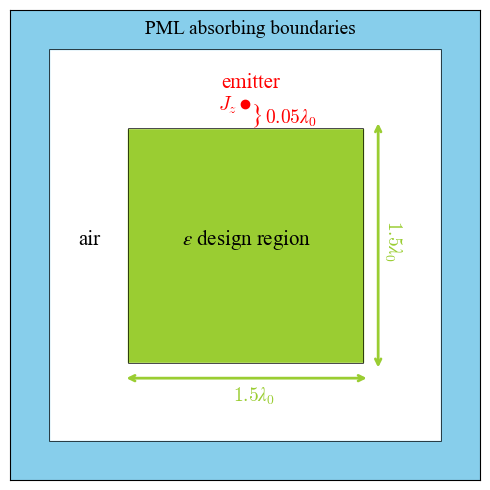

In [129]:
# Set up the figure and axis
figure(figsize=(5, 5))
xlim(0, 6)
ylim(0, 6)  # Dummy y-range

# Color regions
axvspan(1.5, 4.5, color="yellowgreen")
axhspan(4.5, 5.5, color="white")
axhspan(0.5, 1.5, color="white")
axvspan(5.5, 6, color="skyblue")
axvspan(0, 0.5, color="skyblue")

axhspan(0, 0.5, color="skyblue")
axhspan(5.5, 6, color="skyblue")

vlines(0.5, 0.5, 5.5; color="black", linewidth=0.5)
vlines(5.5, 0.5, 5.5; color="black", linewidth=0.5)
vlines(1.5, 1.5, 4.5; color="black", linewidth=0.5)
vlines(4.5, 1.5, 4.5; color="black", linewidth=0.5)
hlines(0.5, 0.5, 5.5; color="black", linewidth=0.5)
hlines(5.5, 0.5, 5.5; color="black", linewidth=0.5)
hlines(1.5, 1.5, 4.5; color="black", linewidth=0.5)
hlines(4.5, 1.5, 4.5; color="black", linewidth=0.5)

text(1.725, 5.7, "PML absorbing boundaries", bbox=Dict("facecolor" => "skyblue", "edgecolor" => "skyblue", "boxstyle" => "square"), fontsize=14)
text(2.2, 3, L"$ε$ design region", bbox=Dict("facecolor" => "yellowgreen", "edgecolor" => "yellowgreen", "boxstyle" => "square"), fontsize=15)
text(0.87, 3, "air", fontsize=15)
text(3.09, 4.58, "}", fontsize=18, color="red")
text(3.25, 4.55, L"$0.05λ_0$", color="red", fontsize=14)
text(2.7, 5, "emitter", color="red", bbox=Dict("facecolor" => "white", "edgecolor" => "white", "boxstyle" => "square, pad=0"), fontsize=15)
text(2.65, 4.72, L"$J_z$", fontsize=14, color="red")

annotate(
    "",                             # no text
    xy=(1.45, 1.3),                    # end point
    xytext=(4.59, 1.3),                # start point
    arrowprops=Dict(
        "arrowstyle" => "<->",     # double-headed arrow
        "linewidth" => 2,
        "color" => "yellowgreen"
    )
)

text(2.85, 1, L"1.5λ_0", color="yellowgreen", fontsize=14)

annotate(
    "",                             # no text
    xy=(4.7, 1.4),                    # end point
    xytext=(4.7, 4.59),                # start point
    arrowprops=Dict(
        "arrowstyle" => "<->",     # double-headed arrow
        "linewidth" => 2,
        "color" => "yellowgreen"
    )
)

text(4.75, 2.85, L"1.5λ_0", color="yellowgreen", fontsize=14, rotation=270)

# Add red vertical line at center
plot(3, 4.8, "ro")

# Ticks and labels
xticks([])
yticks([])

tight_layout()
savefig("new_region2d.pdf", bbox_inches="tight", pad_inches=0)

In [7]:
outside_ε_init = readdlm("C:/Users/jorge/log_epsilon_init.txt")
outside_ε_opt = readdlm("C:/Users/jorge/log_epsilon_opt.txt")
outside_mod_ε_opt = readdlm("C:/Users/jorge/log_mod_epsilon_opt.txt")
outside_Qs = readdlm("C:/Users/jorge/log_Qs.txt")
outside_mod_Qs = readdlm("C:/Users/jorge/log_mod_Qs.txt")
outside_LDOS_vals = readdlm("C:/Users/jorge/log_LDOS_vals.txt") / LDOS_vac
outside_mod_LDOS_vals = readdlm("C:/Users/jorge/log_mod_LDOS_vals.txt") / LDOS_vac;

In [8]:
A, x, y = Maxwell2d(Lx, Ly, outside_ε_init, ω; resolution=res)
@show outside_ω₀_init = sqrt(Arnoldi_eig(A, vec(outside_ε_init), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(outside_ε_init))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - outside_ω₀_init^2); rev = false), Arnoldi()) 
outside_u_init = reshape(abs.(vecs[1]).^2, N,M)

A, x, y = Maxwell2d(Lx, Ly, outside_ε_opt, ω; resolution=res)
@show outside_ω₀_opt = sqrt(Arnoldi_eig(A, vec(outside_ε_opt), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(outside_ε_opt))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - outside_ω₀_opt^2); rev = false), Arnoldi()) 
outside_u_opt = reshape(abs.(vecs[1]).^2, N,M)

A, x, y = Maxwell2d(Lx, Ly, outside_mod_ε_opt, ω; resolution=res)
@show outside_mod_ω₀_opt = sqrt(Arnoldi_eig(A, vec(outside_mod_ε_opt), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(outside_mod_ε_opt))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - outside_mod_ω₀_opt^2); rev = false), Arnoldi()) 
outside_mod_u_opt = reshape(abs.(vecs[1]).^2, N,M);

outside_ω₀_init = sqrt((Arnoldi_eig(A, vec(outside_ε_init), ω, vec(b)))[1]) = 3.141598360319355 - 0.0003212252028719834im


┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (4.61e+00)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


outside_ω₀_opt = sqrt((Arnoldi_eig(A, vec(outside_ε_opt), ω, vec(b)))[1]) = 3.141592688303282 - 1.3332851397779794e-5im


┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (8.52e+00)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


outside_mod_ω₀_opt = sqrt((Arnoldi_eig(A, vec(outside_mod_ε_opt), ω, vec(b)))[1]) = 3.173008565647392 - 1.0050108717512876e-6im


┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (1.05e+01)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


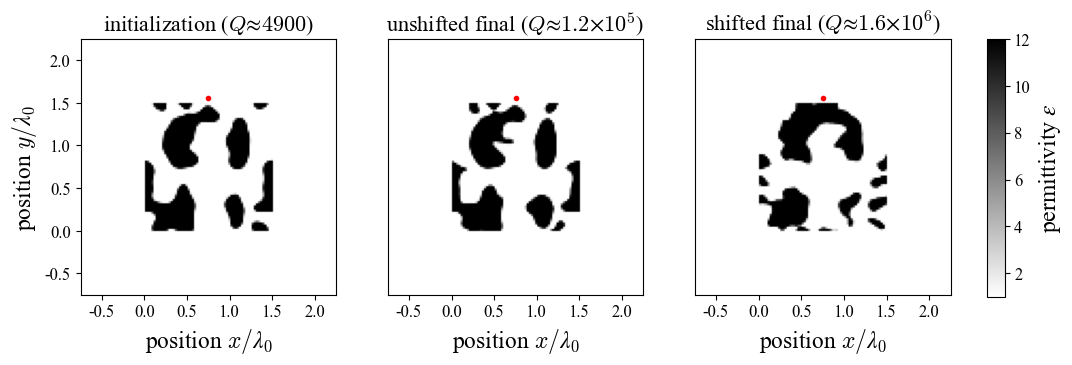

In [95]:
figure(figsize=(12, 4))  # Slightly wider to accommodate colorbar

subplot(1, 3, 1)
im1 = imshow(outside_ε_init, extent=(-1.5, 4.5, -1.5, 4.5), cmap="gray_r", vmin=1, vmax=12)
plot(1.5, 3.12, "ro", markersize=3)
xlabel(L"position $x / λ_0$", fontsize=17)
ylabel(L"position $y / λ_0$", fontsize=17)
yticks([-1, 0, 1, 2, 3, 4], [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
xticks([-1, 0, 1, 2, 3, 4], [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
title(L"initialization ($Q ≈ 4900$)", fontsize=16)

subplot(1, 3, 2)
im2 = imshow(outside_ε_opt, extent=(-1.5, 4.5, -1.5, 4.5), cmap="gray_r", vmin=1, vmax=12)
plot(1.5, 3.12, "ro", markersize=3)
xlabel(L"position $x / λ_0$", fontsize=17)
yticks([])
xticks([-1, 0, 1, 2, 3, 4], [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
title(L"unshifted final ($Q ≈ 1.2 × 10^5$)", fontsize=16)

subplot(1, 3, 3)
im3 = imshow(outside_mod_ε_opt, extent=(-1.5, 4.5, -1.5, 4.5), cmap="gray_r", vmin=1, vmax=12)
plot(1.5, 3.12, "ro", markersize=3)
xlabel(L"position $x / λ_0$", fontsize=17)
yticks([])
xticks([-1, 0, 1, 2, 3, 4], [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
title(L"shifted final ($Q ≈ 1.6 × 10^6$)", fontsize=16)

# Adjust subplot spacing to make room for colorbar
subplots_adjust(right=0.85)

# Add colorbar to the figure
cax = gcf().add_axes([0.88, 0.17, 0.015, 0.645])  # [left, bottom, width, height]
cbar = colorbar(im3, cax=cax)
cbar.set_label(L"permittivity $ε$", fontsize=17)

savefig("log_cavities_2d.pdf", bbox_inches="tight", pad_inches=0)

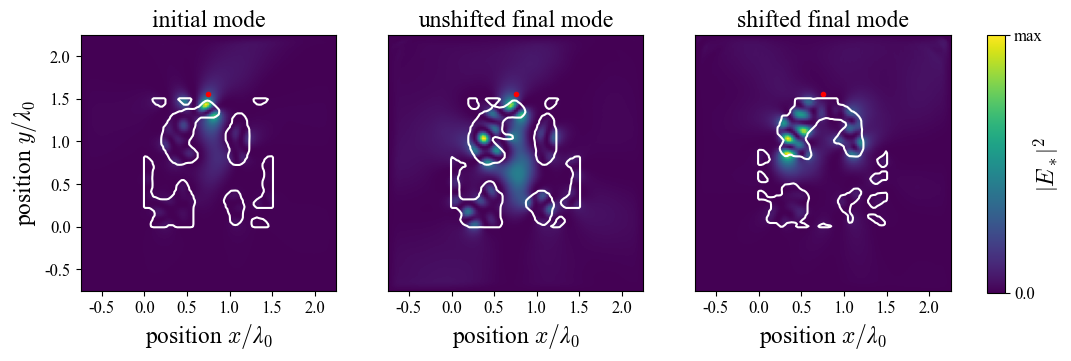

In [96]:
figure(figsize=(12, 4))  # Wider figure

subplot(1, 3, 1)
im1 = imshow(outside_u_init, extent=(-1.5, 4.5, -1.5, 4.5), vmin=0, vmax=maximum(outside_u_init))
plot(1.5, 3.12, "ro", markersize=3)
contour(reverse(outside_ε_init, dims=1), extent=(-1.5, 4.5, -1.5, 4.5), levels=(6.5,), colors=("white",)) ####
xlabel(L"position $x / λ_0$", fontsize=17)
ylabel(L"position $y / λ_0$", fontsize=17)
yticks([-1, 0, 1, 2, 3, 4], [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
xticks([-1, 0, 1, 2, 3, 4], [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
title("initial mode", fontsize=17)

subplot(1, 3, 2)
im2 = imshow(outside_u_opt, extent=(-1.5, 4.5, -1.5, 4.5), vmin=0, vmax=maximum(outside_u_opt))
plot(1.5, 3.12, "ro", markersize=3)
contour(reverse(outside_ε_opt, dims=1), extent=(-1.5, 4.5, -1.5, 4.5), levels=(6.5,), colors=("white",)) ####
yticks([])
xlabel(L"position $x / λ_0$", fontsize=17)
xticks([-1, 0, 1, 2, 3, 4], [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
title("unshifted final mode", fontsize=17)

subplot(1, 3, 3)
im3 = imshow(outside_mod_u_opt, extent=(-1.5, 4.5, -1.5, 4.5), vmin=0, vmax=maximum(outside_mod_u_opt))
plot(1.5, 3.12, "ro", markersize=3)
contour(reverse(outside_mod_ε_opt, dims=1), extent=(-1.5, 4.5, -1.5, 4.5), levels=(6.5,), colors=("white",)) ####
yticks([])
xlabel(L"position $x / λ_0$", fontsize=17)
xticks([-1, 0, 1, 2, 3, 4], [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
title("shifted final mode", fontsize=17)

# Adjust subplot spacing to make room for colorbar
subplots_adjust(right=0.85)

# Add colorbar to the figure
cax = gcf().add_axes([0.88, 0.17, 0.015, 0.645])  # [left, bottom, width, height]
cbar = colorbar(im3, cax=cax)
cbar.set_label(L"$\left|E_*\right|^2$", fontsize=17)
cbar.set_ticks([0, maximum(outside_mod_u_opt)])
cbar.set_ticklabels(["0.0", "max"])
cbar.ax.yaxis.labelpad = -8;

savefig("log_modes2d.pdf", bbox_inches="tight", pad_inches=0)

In [11]:
function make_smooth_plot(lst)
    current = lst[1]
    output = Float64[current]
    for i in 2:length(lst)
        lst_i = lst[i]
        if lst_i > current
            current = lst_i
        end

        push!(output, current)
    end

    return output
end

make_smooth_plot (generic function with 1 method)

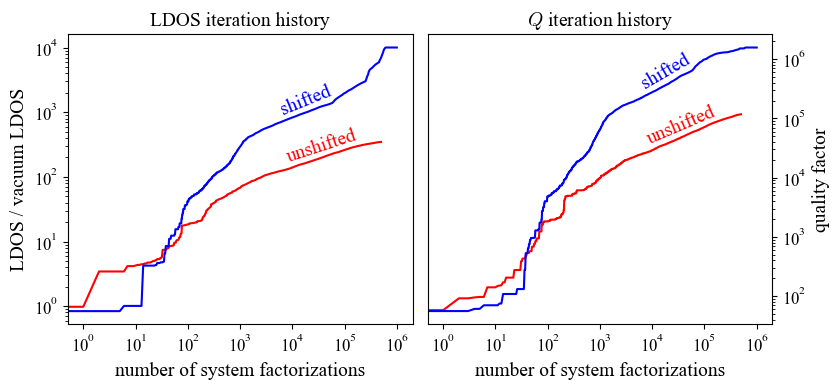

In [15]:
figure(figsize=(8.5, 4))

subplot(1, 2, 1)
loglog(make_smooth_plot(outside_LDOS_vals), color="red")
loglog(make_smooth_plot(outside_mod_LDOS_vals), color="blue")
title("LDOS iteration history", fontsize=14)
ylabel("LDOS / vacuum LDOS", fontsize=14)
xlabel("number of system factorizations", fontsize=14)
xticks([1, 10, 100, 1e3, 1e4, 1e5, 1e6])
text(5.3e3, 9.3e2, "shifted", color="blue", fontsize=14, rotation=22)
text(7e3, 1.7e2, "unshifted", color="red", fontsize=14, rotation=18)

# Right plot
subplot(1, 2, 2)
loglog(make_smooth_plot(outside_Qs), color="red")
loglog(make_smooth_plot(outside_mod_Qs), color="blue")
title(L"$Q$ iteration history", fontsize=14)
ylabel("quality factor", fontsize=14)
gca().yaxis.tick_right()        # move ticks to the right
gca().yaxis.set_label_position("right")  # move label to the right
xlabel("number of system factorizations", fontsize=14)
xticks([1, 10, 100, 1e3, 1e4, 1e5, 1e6])
text(5.3e3, 3.2e5, "shifted", color="blue", fontsize=14, rotation=30)
text(7e3, 3.7e4, "unshifted", color="red", fontsize=14, rotation=23)

tight_layout()
savefig("log_plots2d.pdf", bbox_inches="tight", pad_inches=0)